# Tutorial 04: Dynamics equation

The dynamics of magnetisation field $\mathbf{m}$, without external excitations (e.g. spin-polarised current) is governed by the Landau-Lifshitz-Gilbert (LLG) equation

$$\frac{d\mathbf{m}}{dt} = \underbrace{-\gamma_{0}(\mathbf{m} \times \mathbf{H}_\text{eff})}_\text{precession} + \underbrace{\alpha\left(\mathbf{m} \times \frac{d\mathbf{m}}{dt}\right)}_\text{damping},$$

where $\gamma_{0} = \mu_{0}\gamma$ is the gyromagnetic ratio, $\alpha$ is the Gilbert damping, and $\mathbf{H}_\text{eff} = -\frac{1}{\mu_{0}M_\text{s}}\frac{\delta w(\mathbf{m})}{\delta \mathbf{m}}$ is the effective field. It consists of two terms: precession and damping. In this tutorial, we will explore some basic properties of this equation to understand how to define it in simulations.

We will study the simplest "zero-dimensional" case - macrospin. In the first step, after we import necessary modules and create the mesh which consists of a single discretisation cell.

In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
%matplotlib inline

# Define a macrospin mesh (i.e. one discretisation cell).
p1 = (0, 0, 0)  # first point of the mesh domain (m)
p2 = (1e-9, 1e-9, 1e-9)  # second point of the mesh domain (m)
n = (1, 1, 1)  # discretisation cell size (m)

region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, n=n)

Now, we can create a micromagnetic system object.

In [2]:
system = mm.System(name='macrospin')

Let us assume we have a simple Hamiltonian which consists of only Zeeman energy term

$$w = -\mu_{0}M_\text{s}\mathbf{m}\cdot\mathbf{H},$$

where $M_\text{s}$ is the saturation magnetisation, $\mu_{0}$ is the magnetic constant, and $\mathbf{H}$ is the external magnetic field. We apply the external magnetic field with magnitude $H = 2 \times 10^{6} \,\text{A}\,\text{m}^{-1}$ in the positive $z$ direction.

In [3]:
H = (0, 0, 2e6)  # external magnetic field (A/m)
system.energy = mm.Zeeman(H=H)

In the next step we can define the system's dynamics. Let us assume we have $\gamma_{0} = 2.211 \times 10^{5} \,\text{m}\,\text{A}^{-1}\,\text{s}^{-1}$ and $\alpha=0.1$.

In [4]:
gamma0 = 2.211e5  # gyromagnetic ratio (m/As)
alpha = 0.1  # Gilbert damping

system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)

To check what is our dynamics equation:

In [5]:
system.dynamics

Precession(gamma0=221100.0) + Damping(alpha=0.1)

Before we start running time evolution simulations, we need to initialise the magnetisation. In this case, our magnetisation is pointing in the positive $x$ direction with $M_\text{s} = 8 \times 10^{6} \,\text{A}\,\text{m}^{-1}$. The magnetisation is defined using `Field` class from the `discretisedfield` package we imported earlier.

In [6]:
initial_m = (1, 0, 0)  # vector in x direction
Ms = 8e6  # magnetisation saturation (A/m)

system.m = df.Field(mesh, dim=3, value=initial_m, norm=Ms)

Now, we can run the time evolution using `TimeDriver` for $t=0.1 \,\text{ns}$ and save the magnetisation configuration in $n=200$ steps.

In [7]:
td = oc.TimeDriver()
td.drive(system, t=0.1e-9, n=200)

Running OOMMF (ExeOOMMFRunner) [2020/04/29 12:43]... (2.8 s)


How different system parameters vary with time, we can inspect by showing the system's datatable.

In [8]:
system.table

,E,E_calc_count,max_dm/dt,dE/dt,delta_E,E_zeeman,iteration,stage_iteration,stage,mx,my,mz,last_time_step,t
0,-4.400762e-22,37.0,25204.415522,-8.798712e-10,-3.269612e-22,-4.400762e-22,6.0,6.0,0.0,0.975901,0.217115,0.021888,3.715017e-13,5.000000e-13
1,-8.797309e-22,44.0,25186.311578,-8.786077e-10,-4.396547e-22,-8.797309e-22,8.0,1.0,1.0,0.904810,0.423562,0.043754,5.000000e-13,1.000000e-12
2,-1.318544e-21,51.0,25156.186455,-8.765071e-10,-4.388134e-22,-1.318544e-21,10.0,1.0,2.0,0.790286,0.609218,0.065579,5.000000e-13,1.500000e-12
3,-1.756100e-21,58.0,25114.112032,-8.735776e-10,-4.375555e-22,-1.756100e-21,12.0,1.0,3.0,0.638055,0.765021,0.087341,5.000000e-13,2.000000e-12
4,-2.191985e-21,65.0,25060.188355,-8.698302e-10,-4.358857e-22,-2.191985e-21,14.0,1.0,4.0,0.455710,0.883427,0.109020,5.000000e-13,2.500000e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-2.009865e-20,1402.0,690.438568,-6.602614e-13,-3.374608e-25,-2.009865e-20,396.0,1.0,195.0,0.013011,-0.024099,0.999625,5.000000e-13,9.800000e-11
196,-2.009897e-20,1409.0,675.493807,-6.319876e-13,-3.230101e-25,-2.009897e-20,398.0,1.0,196.0,0.017545,-0.020251,0.999641,5.000000e-13,9.850000e-11
197,-2.009928e-20,1416.0,660.872303,-6.049242e-13,-3.091780e-25,-2.009928e-20,400.0,1.0,197.0,0.021059,-0.015612,0.999656,5.000000e-13,9.900000e-11
198,-2.009958e-20,1423.0,646.567078,-5.790193e-13,-2.959381e-25,-2.009958e-20,402.0,1.0,198.0,0.023428,-0.010435,0.999671,5.000000e-13,9.950000e-11


However, in our case it is much more informative if we plot the time evolution of magnetisation $z$ component $m_{z}(t)$.

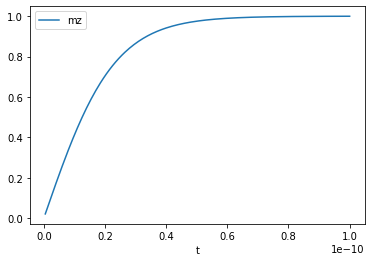

In [9]:
system.table.plot('t', 'mz')

Similarly, we can plot all three magnetisation components

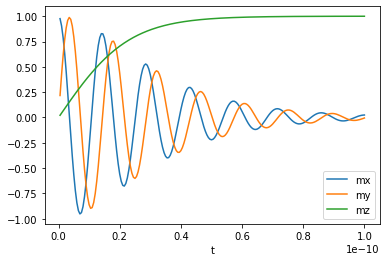

In [10]:
system.table.plot('t', ['mx', 'my', 'mz'])

We can see that after some time the macrospin aligns parallel to the external magnetic field in the $z$ direction.

In [11]:
system.m.k3d_vectors()

Output()

### Exercise 1

Modify Gilbert damping and set it to $\alpha=0.005$ and see what happens with the dynamics.

**Solution**

Running OOMMF (ExeOOMMFRunner) [2020/04/29 12:43]... (2.9 s)


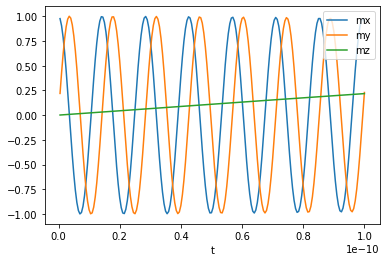

In [12]:
system.dynamics.damping.alpha = 0.005
system.m = df.Field(mesh, dim=3, value=initial_m, norm=Ms)

td.drive(system, t=0.1e-9, n=200)

system.table.plot('t', ['mx', 'my', 'mz']);

### Exercise 2

Repeat the simulation with $\alpha=0.1$ and $\mathbf{H} = (0, 0, -2\times 10^{6})\,\text{A}\,\text{m}^{-1}$.

**Solution**

Running OOMMF (ExeOOMMFRunner) [2020/04/29 12:43]... (2.8 s)


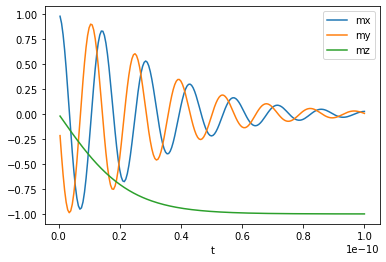

In [13]:
system.energy.zeeman.H = (0, 0, -2e6)
system.dynamics.damping.alpha = 0.1
system.m = df.Field(mesh, dim=3, value=initial_m, norm=Ms)

td.drive(system, t=0.1e-9, n=200)

system.table.plot('t', ['mx', 'my', 'mz']);

### Exercise 3

Keep using $\alpha=0.1$. Change the field from `H = (0, 0, -2e6)` to `H = (0, -1.41e6, -1.41e6)`, and plot
$m_x(t)$, $m_y(t)$ and $m_z(t)$ as above. Can you explain the (initially non-intuitive) output?

Running OOMMF (ExeOOMMFRunner) [2020/04/29 12:43]... (2.8 s)


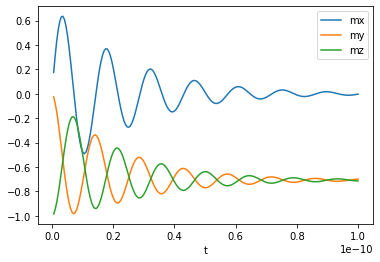

In [14]:
system.energy.zeeman.H = (0, -1.41e6, -1.41e6)

td.drive(system, t=0.1e-9, n=200)

system.table.plot('t', ['mx', 'my', 'mz']);